In [10]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import scipy

# Make the plots appear inline 
%matplotlib inline
# Make the plots interactive
#%matplotlib notebook

plt.rc('text', usetex=False)

file_name = r'ctfire_results_8-10-20.csv'
in_data = pd.read_csv(file_name) # read in the data

pix_to_um = 0.512 # the SHG images have a resolution of 0.512um/pixel 

# Convert the length and width values to microns
in_data['Length'] *= pix_to_um
in_data['Width'] *= pix_to_um

# Use the absolute values of the fiber angle. It's really only meaningful between 0-180
in_data['Angle'] = np.abs(in_data['Angle'])

in_data.describe() # A summary of the data

,ROI,Layer,Angle,Width,Length,Straightness
count,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000
mean,1.935823,2.748368,29.485149,2.976584,33.170336,0.939183
std,0.955985,1.095605,28.456046,0.730633,42.952768,0.052887
min,1.000000,1.000000,0.000000,1.295358,0.724077,0.517350
25%,1.000000,2.000000,5.440332,2.436404,10.784356,0.918066
50%,2.000000,3.000000,15.642246,2.886561,17.525619,0.953674
75%,3.000000,4.000000,54.114917,3.385840,35.904868,0.975300
max,4.000000,4.000000,90.000000,6.593263,423.064776,1.000000


There's not a whole lot of meaningful information there. None of the data is divided into region, ROI, or layer. It does tell us that there are a total of 2758 data points, though. Which is something.

In [11]:
# It's all left eyes. Go ahead and remove that column
in_data = in_data.drop(['Eye'],axis=1)
in_data.head() # Look at the first 5 rows, in part to get the column labels

,Region,ROI,Layer,Angle,Width,Length,Straightness
0,INF,1,1,11.427102,2.981897,51.672318,0.950244
1,INF,1,1,2.770216,1.907401,33.155105,0.958559
2,INF,1,1,4.085617,2.077056,22.708078,0.949388
3,INF,1,1,9.352979,2.284058,48.942164,0.901193
4,INF,1,1,11.944177,3.547880,28.158047,0.966444


Before going any further, I put the images that contain the ROI segments overlaid on the SHG images within the folder. Note these are for eye 9-1_LE, both Inf and Sup scans. 

Text(0.5,1,'Superior')

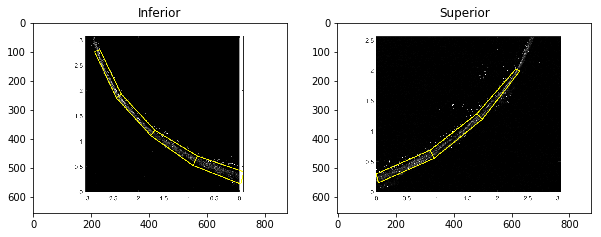

In [12]:
im_fid_inf = r'.\Inf_ROI_seg_plot.png'
im_fid_sup = r'.\Sup_ROI_seg_plot.png'

inf_im = cv2.imread(im_fid_inf)
sup_im = cv2.imread(im_fid_sup)

# cv2 uses BGR ordering whereas pyplot imshow() uses RGB
inf_im = cv2.cvtColor(inf_im,cv2.COLOR_BGR2RGB)
sup_im = cv2.cvtColor(sup_im,cv2.COLOR_BGR2RGB)

# Display the images
this_fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.imshow(inf_im)
ax2.imshow(sup_im)
ax1.set_title(r'Inferior')
ax2.set_title(r'Superior')

The above figure should be interactive, limited to resizing and zooming. Either way, once can see that the inferior region was divided into four distinct 1mm long ROIs whereas the superior region was divided into only three ROIs. 
Note: during the creation of the ROIs, I can define any size I want for the ROI. I went with 1mm here in large part because it reduces the amount of manual preprocessing I have to do after this step, which is defining the sclera boundaries for each ROI image.

Layers are numbered 1-4, with layer 1 being the innermost layer (i.e., layer 4 is posterior)

The following two images are the first (i.e, closest to ONH) ROI for the inferior and superior regions.

Text(0.5,1,'Superior, ROI 1')

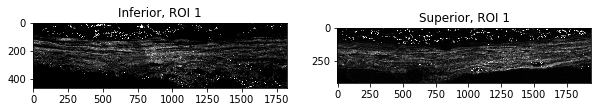

In [13]:
inf_roi_1 = r'9-1_LE_253_INF_MedZoom_ROI-1.tif'
sup_roi_1 = r'9-1_LE_253_SUP_MedZoom_ROI-1.tif'

roi_inf = cv2.imread(inf_roi_1)
roi_sup = cv2.imread(sup_roi_1)

roi_inf = cv2.cvtColor(roi_inf,cv2.COLOR_BGR2RGB)
roi_sup = cv2.cvtColor(roi_sup,cv2.COLOR_BGR2RGB)

roi_fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.imshow(roi_inf)
ax2.imshow(roi_sup)
ax1.set_title('Inferior, ROI 1')
ax2.set_title('Superior, ROI 1')

Okay, now I can start looking at the fiber characteristics. The CT-FIRE analysis gives estimates of fiber angle, length, width, and straightness. As of now, the angle is relative to the image boundary, not the sclera boundary, making the magnitude meaningless for now. I can get the angle relative to the sclera boundary, I just haven't written the code yet to extract that information.

Anyway, there are a whole bunch of ways to split up the data. I can look at it per region (INF vs SUP), by ROI or layer, or any combination of the three. Let's start simple.

Text(0,0.5,'Straightness')

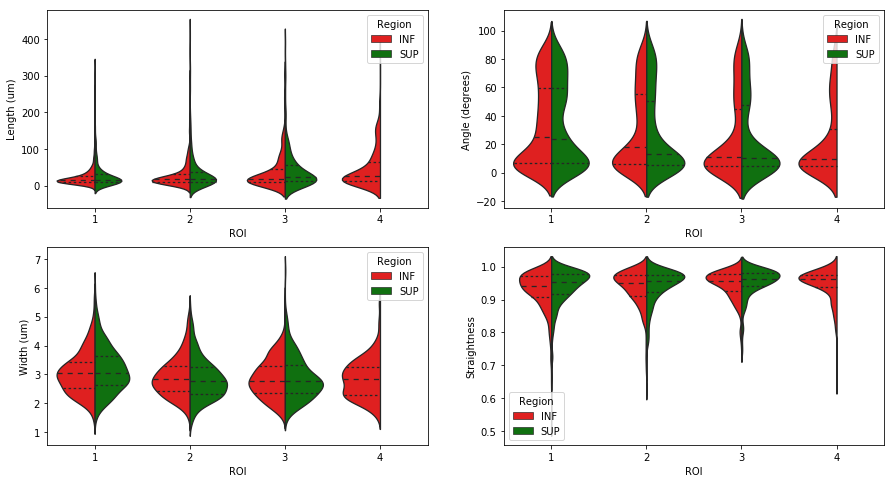

In [14]:
# I'm going to create a violin plot to show the distributions of the
# the fiber parameter estimates by ROI, where the left side of the 'violin' corresponds to the inferior region and
# the right side is the superior region
# To this end, label the data frames
v_fig, ax = plt.subplots(2,2,figsize=(15,8))
sns.violinplot(x="ROI", y="Length", hue="Region", 
               data=in_data, split=True, inner="quart", linewidth=1.3,
               palette={"INF": "red", "SUP": "green"}, ax=ax[0,0])
ax[0,0].set_ylabel('Length (um)')

sns.violinplot(x="ROI", y="Angle", hue="Region", 
               data=in_data, split=True, inner="quart", linewidth=1.3,
               palette={"INF": "red", "SUP": "green"}, ax=ax[0,1])
ax[0,1].set_ylabel('Angle (degrees)')

sns.violinplot(x="ROI", y="Width", hue="Region", 
               data=in_data, split=True, inner="quart", linewidth=1.3,
               palette={"INF": "red", "SUP": "green"}, ax=ax[1,0])
ax[1,0].set_ylabel('Width (um)')

sns.violinplot(x="ROI", y="Straightness", hue="Region", 
               data=in_data, split=True, inner="quart", linewidth=1.3,
               palette={"INF": "red", "SUP": "green"}, ax=ax[1,1])
ax[1,1].set_ylabel('Straightness')

Text(0,0.5,'Straightness')

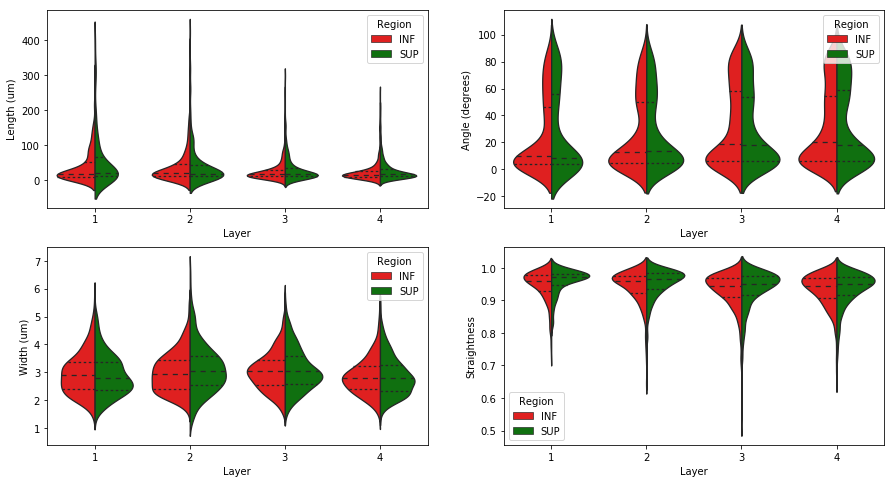

In [15]:
# Repeat the violin plots, except split by Layer, not ROI
v_fig, ax = plt.subplots(2,2,figsize=(15,8))
sns.violinplot(x="Layer", y="Length", hue="Region", 
               data=in_data, split=True, inner="quart", linewidth=1.3,
               palette={"INF": "red", "SUP": "green"}, ax=ax[0,0])
ax[0,0].set_ylabel('Length (um)')

sns.violinplot(x="Layer", y="Angle", hue="Region", 
               data=in_data, split=True, inner="quart", linewidth=1.3,
               palette={"INF": "red", "SUP": "green"}, ax=ax[0,1])
ax[0,1].set_ylabel('Angle (degrees)')

sns.violinplot(x="Layer", y="Width", hue="Region", 
               data=in_data, split=True, inner="quart", linewidth=1.3,
               palette={"INF": "red", "SUP": "green"}, ax=ax[1,0])
ax[1,0].set_ylabel('Width (um)')

sns.violinplot(x="Layer", y="Straightness", hue="Region", 
               data=in_data, split=True, inner="quart", linewidth=1.3,
               palette={"INF": "red", "SUP": "green"}, ax=ax[1,1])
ax[1,1].set_ylabel('Straightness')

Not a whole lot of difference between the Inf/Sup regions, but the distribution is definitely getting wider the further from the ONH the ROI starts. 

Also, those are some long tails. When computing the mean values for length, I should do it two different ways: using the full set of data and be first removing all values of lenght > 200

In [16]:
# Combine the data by region, ROI, and layer. Compute both the mean and standard deviation of the four parameters
# when combining
group_mean = in_data.groupby(['Region','Layer','ROI'],as_index=False).mean()

# For the version of pandas I have, there's a bug when calling the std() function during grouping. Of course.
# So here's a work-around
group_std = in_data.groupby(['Region','Layer','ROI'],as_index=False);
group_std[['Angle','Width','Length','Straightness']].apply(lambda x: x.std()); 

In [17]:
# Repeat, only keeping values of length < 200
alt_data = in_data;
alt_data['Length'].mask(alt_data['Length'] > 200,np.nan,inplace=True)
alt_data.describe() # Will see that only 34 values of Length have been dropped

,ROI,Layer,Angle,Width,Length,Straightness
count,2758.000000,2758.000000,2758.000000,2758.000000,2724.000000,2758.000000
mean,1.935823,2.748368,29.485149,2.976584,30.073396,0.939183
std,0.955985,1.095605,28.456046,0.730633,32.356848,0.052887
min,1.000000,1.000000,0.000000,1.295358,0.724077,0.517350
25%,1.000000,2.000000,5.440332,2.436404,10.666330,0.918066
50%,2.000000,3.000000,15.642246,2.886561,17.269031,0.953674
75%,3.000000,4.000000,54.114917,3.385840,34.554352,0.975300
max,4.000000,4.000000,90.000000,6.593263,196.852266,1.000000


In [18]:
group_mean_alt = alt_data.groupby(['Region','Layer','ROI'],as_index=False).mean()
# Again, work-around for std
group_std_alt = alt_data.groupby(['Region','Layer','ROI'],as_index=False);
group_std_alt[['Angle','Width','Length','Straightness']].apply(lambda x: x.std()); 

In [19]:
# Alternative to do the grouping. May make things easier?
group_stats = in_data.groupby(['Region','Layer','ROI'],as_index=False).agg([np.mean, np.std])
group_stats_alt = alt_data.groupby(['Region','Layer','ROI'],as_index=False).agg([np.mean, np.std])

group_stats.head()

Angle                Width               Length  \
                       mean        std      mean       std       mean   
Region Layer ROI                                                        
INF    1     1    25.419916  27.278807  3.170826  0.873247  29.502624   
             2    25.811059  27.923395  2.872004  0.659923  37.605589   
             3    21.343813  27.402333  2.820655  0.628523  40.666588   
             4    25.770469  27.602366  2.858236  0.714025  43.666311   
       2     1    28.891867  29.519337  3.057641  0.703517  31.341266   

                            Straightness            
                        std         mean       std  
Region Layer ROI                                    
INF    1     1    27.893222     0.937478  0.053834  
             2    40.977959     0.952264  0.045373  
             3    44.530203     0.952331  0.043859  
             4    46.189098     0.947904  0.042253  
       2     1    32.760892     0.935418  0.053950

Text(0,0.5,'Length (um)')

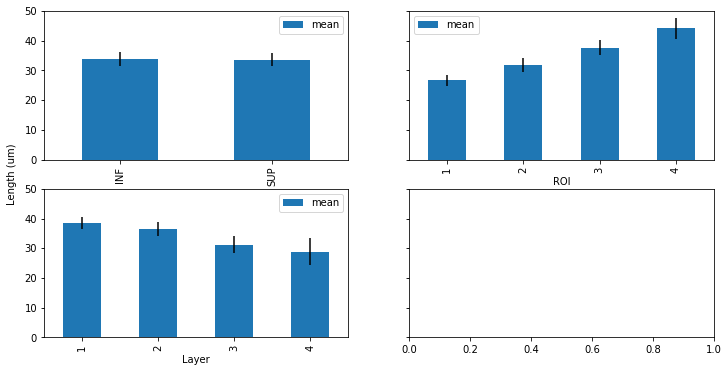

In [20]:
# Let's look at the fiber length stats first
# Using all fiber length estimates
df_length = group_stats['Length']

# I'll look at the mean of the fiber lengths per region, ROI, and layer separately
# Note that the standard error is computed from the means

# By Region
len_reg = df_length.groupby(['Region'],as_index=False)['mean'].agg([np.mean, scipy.stats.sem])

# By ROI 
len_roi = df_length.groupby(['ROI'],as_index=False)['mean'].agg([np.mean, scipy.stats.sem])

# By Layer
len_layer = df_length.groupby(['Layer'],as_index=False)['mean'].agg([np.mean, scipy.stats.sem])

# Create bar plots for each
len_fig, ax = plt.subplots(2,2,figsize=(12,6),sharey='all')
len_reg.plot(kind='bar',y='mean',yerr='sem',ax=ax[0,0])

len_roi.plot(kind='bar',y='mean',yerr='sem',ax=ax[0,1])

len_layer.plot(kind='bar',y='mean',yerr='sem',ax=ax[1,0])

# To create a common axes label, create a new subfigure that encapsulates all the other subfigures.
# Turn off its axes and set its label.
len_fig.add_subplot(111,frame_on=False)
plt.tick_params(labelcolor='none',left=False,bottom=False)
plt.ylabel('Length (um)')

Now we're getting somewhere! There's doesn't appear to be a difference in fiber length when comparing the Inf/Sup regions. But, the fiber length seems to be increasing the further away from the ONH and decreasing from scleral layers 1->4. 

Text(0,0.5,'Length (um)')

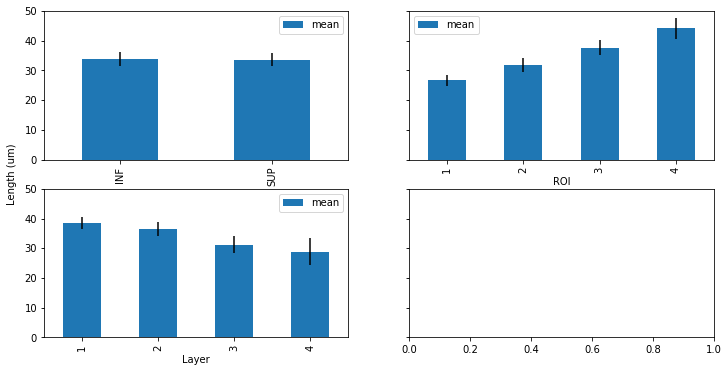

In [21]:
# Do the same thing, except use only the estimated fiber lengths < 200um
df_length = group_stats_alt['Length']

# I'll look at the mean of the fiber lengths per region, ROI, and layer separately
# Note that the standard error is computed from the means

# By Region
len_reg = df_length.groupby(['Region'],as_index=False)['mean'].agg([np.mean, scipy.stats.sem])

# By ROI 
len_roi = df_length.groupby(['ROI'],as_index=False)['mean'].agg([np.mean, scipy.stats.sem])

# By Layer
len_layer = df_length.groupby(['Layer'],as_index=False)['mean'].agg([np.mean, scipy.stats.sem])

# Create bar plots for each
len_fig, ax = plt.subplots(2,2,figsize=(12,6),sharey='all')
len_reg.plot(kind='bar',y='mean',yerr='sem',ax=ax[0,0])

len_roi.plot(kind='bar',y='mean',yerr='sem',ax=ax[0,1])

len_layer.plot(kind='bar',y='mean',yerr='sem',ax=ax[1,0])

# To create a common axes label, create a new subfigure that encapsulates all the other subfigures.
# Turn off its axes and set its label.
len_fig.add_subplot(111,frame_on=False)
plt.tick_params(labelcolor='none',left=False,bottom=False)
plt.ylabel('Length (um)')

The length of the bars changed slighlty, but there's no significant difference when excluding the very large estimated fiber lengths. For now, I'll stick with using all parameter estimates.

I'm not going to repeat the above exactly. The preceding method allowed me to add error bars. For the next plots, I'm not going to worry about that. I'll add them if I can figure out how (without a bunch of additional code)

In [22]:
group_stats.index

MultiIndex(levels=[['INF', 'SUP'], [1, 2, 3, 4], [1, 2, 3, 4]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['Region', 'Layer', 'ROI'])

In [23]:
sub_data = in_data.groupby(['Region','ROI','Layer'],as_index=False).mean()

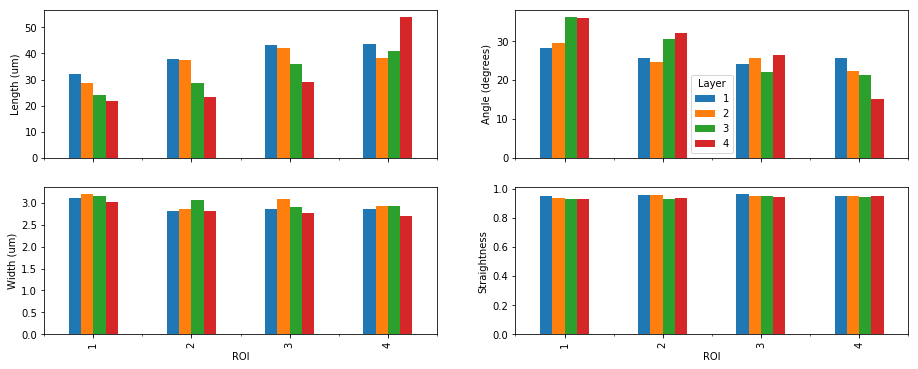

In [24]:
# Create smaller data frames that can be later pivoted.
ld = sub_data[['ROI','Layer','Length']]
ad = sub_data[['ROI','Layer','Angle']]
wd = sub_data[['ROI','Layer','Width']]
sd = sub_data[['ROI','Layer','Straightness']]

ldp = ld.pivot_table(index='ROI',columns='Layer',values='Length')
adp = ad.pivot_table(index='ROI',columns='Layer',values='Angle')
wdp = wd.pivot_table(index='ROI',columns='Layer',values='Width')
sdp = sd.pivot_table(index='ROI',columns='Layer',values='Straightness')

gs = dict(left=0.1, right=0.9, bottom=0.05, top=0.95)
f, (ax) = plt.subplots(2,2,figsize=(15,5),sharex='all',gridspec_kw=gs)
ldp.plot.bar(ax=ax[0,0])
adp.plot.bar(ax=ax[0,1])
wdp.plot.bar(ax=ax[1,0])
sdp.plot.bar(ax=ax[1,1])

ax[0,0].set_ylabel(r'Length (um)')
ax[0,1].set_ylabel(r'Angle (degrees)')
ax[1,0].set_ylabel(r'Width (um)')
ax[1,1].set_ylabel(r'Straightness')

ax[0,0].get_legend().remove()
ax[1,0].get_legend().remove()
ax[1,1].get_legend().remove()

What we're looking at are plots of the four parameters split up by ROI, and within each ROI split by layer. Note this combines the Inf/Sup regions. Looking specifically at fiber length, one can still see that the length tends to increase from ROI 1->4 and decreases across layers within an ROI. 

I want to point out that for the fiber angle, there is a value for layer 1 in ROI 4, it's just very small:
(This comment made sense before I switched to using the magnitude of the angle)

In [25]:
adp.head()

Layer,1,2,3,4
ROI,,,,
1,28.159005,29.467879,36.146524,36.011304
2,25.732080,24.585680,30.467559,32.031357
3,24.131839,25.698611,22.003960,26.366696
4,25.770469,22.459575,21.271252,15.089002
